Train a CNN with less data
    + Vanilla
    + Data Aumentation
    + Using pretrained for feature extraction 
    + transfer learning by fine tunning existing network

In [73]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import os
import shutil

### Section 1

Create the following folder structure

![title](1.PNG)

In [21]:
original_dataset_dir = "D:/Datasets/kaggle_cat_vs_dog"
cat_org_dataset_dir = os.path.join(original_dataset_dir, 'Cat')
dog_org_dataset_dir = os.path.join(original_dataset_dir, 'Dog')

In [3]:
base_dir = "D:/Datasets/cats_and_dogs_small_1"

In [ ]:
os.makedirs(base_dir)

In [11]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')


In [12]:

os.makedirs(train_dir)
os.makedirs(test_dir)
os.makedirs(validation_dir)

In [13]:
train_cats_dir = os.path.join(train_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')
validations_cats_dir = os.path.join(validation_dir, 'cats')

In [14]:
os.makedirs(train_cats_dir)
os.makedirs(test_cats_dir)
os.makedirs(validations_cats_dir)

In [15]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')
validations_dogs_dir = os.path.join(validation_dir, 'dogs')

In [16]:
os.makedirs(train_dogs_dir)
os.makedirs(test_dogs_dir)
os.makedirs(validations_dogs_dir)

### Section 2

Transfer the files to populate these folders - 2000, 1000, 1000 per class for training, validation and testing respectively

In [20]:
# Cats first

fnames = ['{}.jpg'.format(i) for i in range(2000)]
print(fnames[:10])

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


In [22]:
for fname in fnames:
    
    src = os.path.join(cat_org_dataset_dir, fname)
    dest = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src, dest)

In [38]:
fnames = ['{}.jpg'.format(i) for i in range(2000,3000)]
print(fnames[:10])

['2000.jpg', '2001.jpg', '2002.jpg', '2003.jpg', '2004.jpg', '2005.jpg', '2006.jpg', '2007.jpg', '2008.jpg', '2009.jpg']


In [39]:
for fname in fnames:
    
    src = os.path.join(cat_org_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dest)

In [36]:
fnames = ['{}.jpg'.format(i) for i in range(3000,4000)]
print(fnames[:10])

['3000.jpg', '3001.jpg', '3002.jpg', '3003.jpg', '3004.jpg', '3005.jpg', '3006.jpg', '3007.jpg', '3008.jpg', '3009.jpg']


In [37]:
for fname in fnames:
    
    src = os.path.join(cat_org_dataset_dir, fname)
    dest = os.path.join(validations_cats_dir, fname)
    
    shutil.copyfile(src,dest)

In [42]:
# dogs now

fnames = ['{}.jpg'.format(i) for i in range(2000)]
print(fnames[:10])

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


In [43]:
for fname in fnames:
    
    src = os.path.join(dog_org_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dest)

In [45]:
fnames = ['{}.jpg'.format(i) for i in range(2000,3000)]
print(fnames[:10])

['2000.jpg', '2001.jpg', '2002.jpg', '2003.jpg', '2004.jpg', '2005.jpg', '2006.jpg', '2007.jpg', '2008.jpg', '2009.jpg']


In [46]:
for fname in fnames:
    
    src = os.path.join(dog_org_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dest)

In [48]:
fnames = ['{}.jpg'.format(i) for i in range(3000,4000)]
print(fnames[:10])

['3000.jpg', '3001.jpg', '3002.jpg', '3003.jpg', '3004.jpg', '3005.jpg', '3006.jpg', '3007.jpg', '3008.jpg', '3009.jpg']


In [49]:
for fname in fnames:
    
    src = os.path.join(dog_org_dataset_dir, fname)
    dest = os.path.join(validations_dogs_dir, fname)
    shutil.copyfile(src, dest)

In [51]:
# sanity checks - count number of files in each folder

print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))

print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

print(len(os.listdir(validations_cats_dir)))
print(len(os.listdir(validations_dogs_dir)))

2000
2000
1000
1000
1000
1000


### Section 3

Define the network

In [54]:
from keras import Sequential
from keras import layers

In [58]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [60]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

### Section 4

Data preprocessing

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know,
neural networks prefer to deal with small input values).

In [62]:
from keras.preprocessing.image import ImageDataGenerator

In [69]:
train_datagen = ImageDataGenerator(rescale=1./255) # rescale by 1/255
validation_datagen = ImageDataGenerator(rescale=1./255)

In [65]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 4000 images belonging to 2 classes.


In [70]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [71]:
#for data_batch, label_batch in train_generator:
#    print(data_batch.shape)
#    print(label_batch.shape)
    

(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)


c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5

(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293863424 bytes but only got 0. Skipping 

(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)
(20, 150, 150, 3)
(20,)


OSError: cannot identify image file 'D:/Datasets/cats_and_dogs_small_1\\train\\cats\\666.jpg'

### Section 5

    Fit the model


In [80]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data = validation_generator,
            validation_steps=50
)

Epoch 1/30
 67/100 [===================>..........] - ETA: 42s - loss: 0.6899 - acc: 0.5366

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping 

 99/100 [============================>.] - ETA: 1s - loss: 0.6897 - acc: 0.5333

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


100/100 [==============================] - 151s 2s/step - loss: 0.6896 - acc: 0.5335 - val_loss: 0.6783 - val_acc: 0.5630
Epoch 2/30
 11/100 [==>...........................] - ETA: 2:03 - loss: 0.6725 - acc: 0.5773

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping 

100/100 [==============================] - 152s 2s/step - loss: 0.6842 - acc: 0.5645 - val_loss: 0.6864 - val_acc: 0.5340
Epoch 3/30
100/100 [==============================] - 151s 2s/step - loss: 0.6629 - acc: 0.5980 - val_loss: 0.6717 - val_acc: 0.5850
Epoch 4/30
100/100 [==============================] - 155s 2s/step - loss: 0.6634 - acc: 0.6025 - val_loss: 0.6654 - val_acc: 0.5700
Epoch 5/30
100/100 [==============================] - 156s 2s/step - loss: 0.6379 - acc: 0.6440 - val_loss: 0.6630 - val_acc: 0.5960
Epoch 6/30
100/100 [==============================] - 161s 2s/step - loss: 0.6322 - acc: 0.6400 - val_loss: 0.6477 - val_acc: 0.5960
Epoch 7/30
100/100 [==============================] - 153s 2s/step - loss: 0.6036 - acc: 0.6775 - val_loss: 0.6100 - val_acc: 0.6460
Epoch 8/30
100/100 [==============================] - 152s 2s/step - loss: 0.5760 - acc: 0.7105 - val_loss: 0.6112 - val_acc: 0.6640
Epoch 9/30
100/100 [==============================] - 153s 2s/step - loss: 0.547

In [81]:
model.save('cats_and_dogs_small_1.h5')

### Section 6
    
    Plotting

In [82]:
import matplotlib.pyplot as plt

In [83]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [84]:
epochs = range(1, len(acc) + 1)

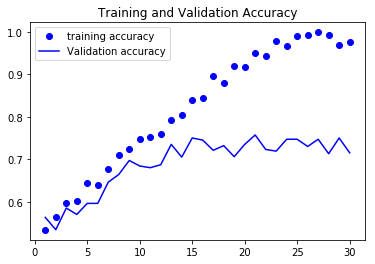

In [85]:
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.legend()



In [86]:
plt.figure()

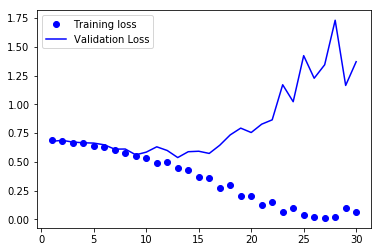

In [87]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.legend()

In [88]:
plt.show()